<a href="https://colab.research.google.com/github/Palash3110/Visualisation/blob/main/Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [ ]:
datasheet=pd.read_csv('hospital.csv')

In [ ]:
datasheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
datasheet.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


from here we can say that, insurance company consider's age [18,64]

## AGE

In [ ]:
datasheet.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

no of bins= (max-min)+1
          = 64-18+1=47
          

In [ ]:
fig= px.histogram(datasheet,x='age',marginal='box',nbins=47,title='Distribution of Age')
fig.update_layout(bargap=.1)
fig.show()

## BMI
under weight<18.5
normal weight [18,5,24.9)
overweight [24.9,29.9)
Obese   [29.9,39.9)
morbid obese>=39.9

In [ ]:
fig=px.histogram(datasheet,x='bmi',marginal='box',color_discrete_sequence=['red'],title='Distribution of BMI')
fig.update_layout(bargap=.1)
fig.show()

## Charges

In [ ]:
fig=px.histogram(datasheet,x='charges',marginal='box',color='smoker',color_discrete_sequence=['green','grey'],title='Annual Medical Charges')
fig.update_layout(bargap=.1)
fig.show()

In [ ]:
fig=px.histogram(datasheet,x='charges',marginal='box',color='sex',color_discrete_sequence=['orange','grey'],title='Annial Medical Charges')
fig.update_layout(bargap=.1)
fig.show()

In [ ]:
fig=px.histogram(datasheet,x='charges',marginal='box',color='region',color_discrete_sequence=['yellow','grey'],title='Annial Medical Charges')
fig.update_layout(bargap=.1)
fig.show()

##  Smokers

In [ ]:
datasheet.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
fig=px.bar(datasheet,x='smoker',color='sex',title='Smoker')
fig.show()

## Age and Charges

In [ ]:
fig=px.scatter(datasheet,x='age',y='charges',color='smoker',opacity=.8,hover_data=['sex'],title='Age Vs Charge')
fig.update_traces(marker_size=5)
fig.show()

##Bmi vs Charges

In [ ]:
fig=px.scatter(datasheet,x='bmi',y='charges',color='sex',opacity=.8,hover_data=['sex'],title='Age Vs Charge')
fig.update_traces(marker_size=5)
fig.show()

## Correlation

computing correlation for numerical coloumns

In [ ]:
datasheet.charges.corr(datasheet.age)

0.2990081933306477

In [ ]:
datasheet.charges.corr(datasheet.bmi)

0.19834096883362876

In [ ]:
datasheet.charges.corr(datasheet.children)

0.0679982268479047

computing correlation for categorical data

In [ ]:
smoker_value={'no':0,'yes':1}
smoker_numeric=datasheet.smoker.map(smoker_value)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
datasheet.charges.corr(smoker_numeric)

0.787251430498478

In [ ]:
datasheet.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation MAtrix')

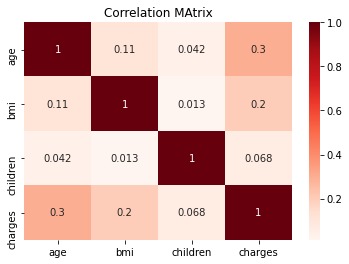

In [ ]:
sns.heatmap(datasheet.corr(),cmap='Reds',annot=True,)
plt.title('Correlation MAtrix')

## Linear Regression using a Single Feature

In [ ]:
non_smokers=datasheet[datasheet.smoker=='no']

Text(0.5, 1.0, 'Age vs Charges of non smokers')

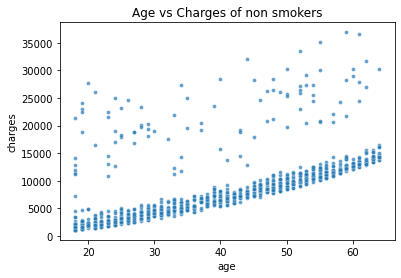

In [ ]:
sns.scatterplot(data=non_smokers,x= 'age', y='charges', alpha=.7, s=15)
plt.title("Age vs Charges of non smokers")

In [ ]:
X=non_smokers[['age']]
y=non_smokers['charges']

In [ ]:
X.shape

(1064, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict(np.array([[23],[37],[61]]))

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
predictions=model.predict(X)

In [ ]:
predictions

In [ ]:
rmse=(y,predictions)
rmse

(1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
 5        3756.62160
            ...     
 1332    11411.68500
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 Name: charges, Length: 1064, dtype: float64,
 array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
        2719.0598744 , 3520.80661289]))

In [ ]:
#W
model.coef_

array([267.24891283])

In [ ]:
#b
model.intercept_

-2091.4205565650864

##Binary Categories